# Mulai

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/data_fix.csv')

In [ ]:
df.head()

,topik,Answer,Year,Answer_fix
0,adhd,alo selamat siang dari penjelasan anda anda me...,2024,"['susah', 'fokus', 'susah', 'fokus', 'tanda', ..."
1,adhd,alo terimakasih atas pertanyaannya adhd sering...,2024,"['adhd', 'gejala', 'kisar', 'usia', 'gejala', ..."
2,adhd,alo terimakasih atas pertanyaannya sering mera...,2024,"['cemas', 'gugup', 'tegang', 'sulit', 'konsent..."
3,adhd,alo terimakasih atas pertanyaannya mudah gelis...,2024,"['mudah', 'gelisah', 'sulit', 'fokus', 'tanda'..."
4,adhd,alo terimakasih atas pertanyaannya adhd attent...,2024,"['adhd', 'attention', 'deficit', 'hyperactivit..."


In [ ]:
df['Answer_fix'] = df['Answer_fix'].apply(eval)

# Import Pustaka

In [ ]:
!pip install pyLDAvis
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.2 MB/s eta 0:00:00


In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ekstraksi Fitur

In [ ]:
texts = df['Answer_fix'].tolist()

In [ ]:
# Ekstraksi fitur dengan BOW
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

## simpan ekstraksi fitur ke file

In [ ]:
import pickle

In [ ]:
# Menentukan path
path = '/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/LDA_tambah jumlah topik/pickle data/'

In [ ]:
# Menyimpan texts ke file
with open(f'{path}texts1.pkl', 'wb') as f:
    pickle.dump(texts, f)

# Menyimpan dictionary ke file
dictionary.save(f'{path}dictionary1.gensim')

# Menyimpan corpus ke file
with open(f'{path}corpus1.pkl', 'wb') as f:
    pickle.dump(corpus, f)

In [ ]:
# # Memuat texts dari file
# with open(f'{path}texts1.pkl', 'rb') as f:
#     texts = pickle.load(f)

# # Memuat dictionary dari file
# dictionary = corpora.Dictionary.load(f'{path}dictionary1.gensim')

# # Memuat corpus dari file
# with open(f'{path}corpus1.pkl', 'rb') as f:
#     corpus = pickle.load(f)

# Membangun topik model

## Mencari coherence values optimal

In [ ]:
from tqdm import tqdm

def build_lda_models(dictionary, corpus, start, limit, step):
    model_list = []
    # Menggunakan tqdm untuk progress bar pada range
    for num_topics in tqdm(range(start, limit, step), desc="Membangun Model"):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=500,
                         passes=5,
                         iterations=100,
                         alpha='asymmetric',
                         eta='symmetric',
                         per_word_topics=True)
        model_list.append(model)
    return model_list

In [ ]:
# Menjalankan fungsi untuk membuat model
model_list = build_lda_models(dictionary=dictionary, corpus=corpus, start=5, limit=51, step=5)

# Menyimpan model_list ke file
with open(f'{path}model_list1.pkl', 'wb') as f:
    pickle.dump(model_list, f)

Membangun Model: 100%|██████████| 10/10 [10:36<00:00, 63.62s/it]


In [ ]:
from tqdm import tqdm

def get_coherence_values(model_list, dictionary, texts):
    coherence_values = []
    for model in tqdm(model_list, desc="Calculating Coherence"):
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

In [ ]:
# Menjalankan fungsi untuk mendapatkan nilai coherence model
coherence_values = get_coherence_values(model_list=model_list, dictionary=dictionary, texts=texts)

# Menyimpan coherence_values ke file
with open(f'{path}coherence_values1.pkl', 'wb') as f:
    pickle.dump(coherence_values, f)

Calculating Coherence: 100%|██████████| 10/10 [02:17<00:00, 13.72s/it]


In [ ]:
# # Memuat kembali data file pickle
# with open(f'{path}model_list1.pkl', 'rb') as f:
#     model_list = pickle.load(f)

# with open(f'{path}coherence_values1.pkl', 'rb') as f:
#     coherence_values = pickle.load(f)

## hasil iterasi

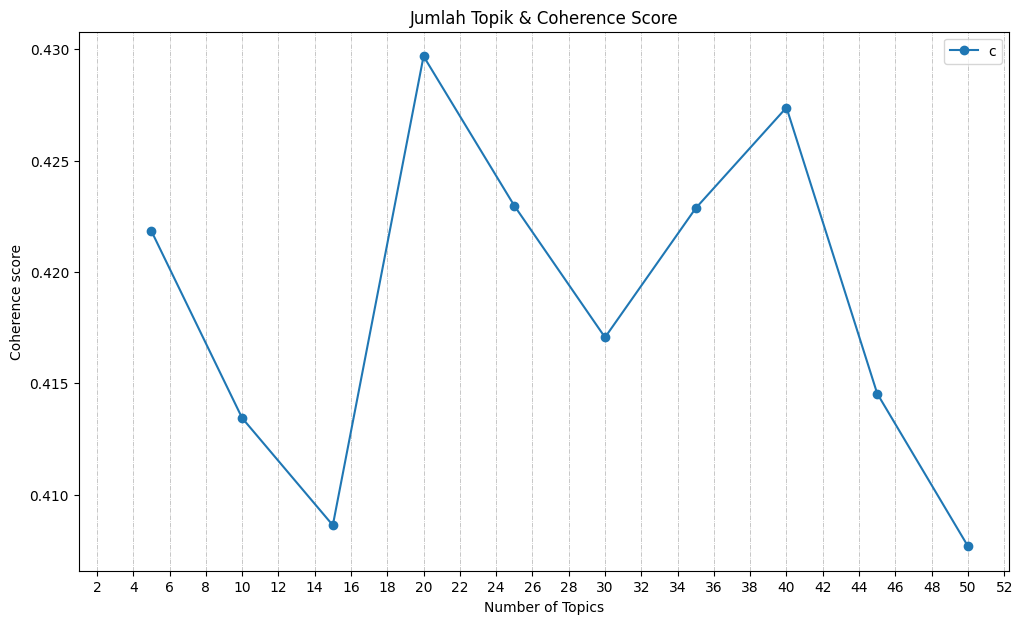

In [ ]:
# Menampilkan grafik coherence score
limit=51; start=5; step=5;
x = range(start, limit, step)

# Membuat plot
plt.figure(figsize=(12, 7))  # Mengatur ukuran grafik memanjang ke samping
plt.plot(x, coherence_values, marker='o')  # Menambahkan marker untuk setiap titik

# Menyesuaikan skala label di sumbu x
plt.xticks(range(1, limit, 2))

# menambahkan garis background
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)

# Menyesuaikan interval grid pada sumbu x
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.title("Jumlah Topik & Coherence Score")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Mencetak nilai coherence score
for m, cv in zip(x, coherence_values):
    print(f"Num Topics = {m} has Coherence Value of {cv}")

Num Topics = 5 has Coherence Value of 0.42183812912336915
Num Topics = 10 has Coherence Value of 0.41344654346149723
Num Topics = 15 has Coherence Value of 0.40863195232128185
Num Topics = 20 has Coherence Value of 0.42968038935029007
Num Topics = 25 has Coherence Value of 0.4229727809413874
Num Topics = 30 has Coherence Value of 0.41706396287422165
Num Topics = 35 has Coherence Value of 0.42286104485981374
Num Topics = 40 has Coherence Value of 0.427378507254185
Num Topics = 45 has Coherence Value of 0.4145416284874215
Num Topics = 50 has Coherence Value of 0.40769090866719443


In [ ]:
# Menentukan jumlah topik optimal berdasarkan coherence value terbaik
max_coherence = max(coherence_values)
print(f"Nilai coherence tertinggi: {max_coherence}")
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print(f"Jumlah topik yang memberikan nilai coherence tertinggi: {optimal_num_topics}")

Nilai coherence tertinggi: 0.42968038935029007
Jumlah topik yang memberikan nilai coherence tertinggi: 20


## hasil model

In [ ]:
# Mengambil model optimal dengan nilai coherence tertinggi
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]

In [ ]:
# Menyimpan model ke file pickle
with open(f'{path}lda_bow_model.pkl', 'wb') as f:
    pickle.dump(optimal_model, f)

In [ ]:
# # Menghitung nilai coherence dari model optimal
# coherence_model_lda = CoherenceModel(model=optimal_model, texts=texts, dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()

# # Menampilkan nilai coherence
# print(f"Coherence Score: {coherence_lda}")

In [ ]:
# Menampilkan topik dengan pprint
from pprint import pprint
pprint(optimal_model.print_topics())

[(0,
  '0.074*"dokter" + 0.045*"periksa" + 0.031*"gejala" + 0.027*"keluh" + '
  '0.027*"sehat" + 0.019*"langsung" + 0.019*"bantu" + 0.017*"pasien" + '
  '0.015*"spesialis" + 0.014*"ganggu"'),
 (1,
  '0.163*"anak" + 0.053*"tua" + 0.051*"usia" + 0.038*"suami" + 0.027*"dewasa" '
  '+ 0.023*"laki" + 0.020*"istri" + 0.018*"remaja" + 0.018*"rumah" + '
  '0.015*"bantu"'),
 (2,
  '0.084*"pasang" + 0.067*"hubung" + 0.066*"salur" + 0.055*"diabetes" + '
  '0.037*"mekanisme" + 0.029*"candu" + 0.026*"puas" + 0.026*"kemih" + '
  '0.025*"henti" + 0.024*"beda"'),
 (3,
  '0.030*"kondisi" + 0.023*"ganggu" + 0.021*"mental" + 0.020*"psikiater" + '
  '0.019*"beda" + 0.018*"alami" + 0.017*"psikolog" + 0.016*"periksa" + '
  '0.015*"sekian" + 0.015*"pribadi"'),
 (4,
  '0.029*"stres" + 0.027*"coba" + 0.026*"kondisi" + 0.023*"atur" + '
  '0.023*"olahraga" + 0.019*"laku" + 0.018*"bantu" + 0.018*"ganggu" + '
  '0.016*"alami" + 0.014*"napas"'),
 (5,
  '0.084*"ganggu" + 0.053*"dokter" + 0.050*"jiwa" + 0.037*"alami"

In [ ]:
# Hanya memuat kata teratas
topics = [[(term, round(wt, 3)) for term, wt in optimal_model.show_topic(n, topn=30)] for n in range(0, optimal_model.num_topics)]

# # Mendefinisikan seluruh corpus dari topik-topik dalam model LDA
# topics = [[(term, round(wt, 3)) for term, wt in optimal_model.show_topic(n, topn=None)] for n in range(optimal_model.num_topics)]

In [ ]:
# Membuat DataFrame untuk Topic-Term
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns=['Term'+str(i) for i in range(1, 31)], index=['Topic '+str(t) for t in range(1, optimal_model.num_topics+1)]).T

# # Membuat DataFrame untuk seluruh Topic-Term
# topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics],
#                          columns=['Term'+str(i) for i in range(1, len(topics[0])+1)],
#                          index=['Topic '+str(t) for t in range(1, optimal_model.num_topics+1)]).T

topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
Term1,dokter,anak,pasang,kondisi,stres,ganggu,kerja,obat,depresi,dokter,menstruasi,emosi,otak,keluh,rambut,ganggu,teman,ganggu,cemas,kondisi
Term2,periksa,tua,hubung,ganggu,coba,dokter,hadap,ganggu,alami,periksa,hamil,marah,halusinasi,ganggu,laku,gejala,bicara,keluh,panik,alami
Term3,gejala,usia,salur,mental,kondisi,jiwa,jalan,kondisi,siklus,makan,hormon,mudah,skizofrenia,stres,salah,obat,ajak,kondisi,ganggu,bantu
Term4,keluh,suami,diabetes,psikiater,atur,alami,hidup,faktor,gejala,sakit,kandung,menang,dengar,laku,sosial,ubah,khayal,dokter,takut,laku
Term5,sehat,dewasa,mekanisme,beda,olahraga,keluh,pikir,terapi,asa,obat,wanita,ubah,alami,sehat,pribadi,mental,adik,hidup,serang,konsultasi
Term6,langsung,laki,candu,alami,laku,kondisi,selesai,hidup,sedih,darah,buah,daerah,suara,aktivitas,ajar,derita,tua,muncul,jantung,kontrol
Term7,bantu,istri,puas,psikolog,bantu,obat,saudara,psikiater,seksual,keluh,darah,amarah,derita,alami,hubung,mood,bantu,bantu,debar,stres
Term8,pasien,remaja,kemih,periksa,ganggu,psikiater,tugas,jalan,hilang,tidur,ubah,kontrol,saraf,makan,interaksi,pasien,kakak,jiwa,gejala,picu
Term9,spesialis,rumah,henti,sekian,alami,bantu,respon,riwayat,turun,konsumsi,normal,sedih,ganggu,periksa,sulit,depresi,ukur,stres,alami,pikir
Term10,ganggu,bantu,beda,pribadi,napas,pikir,usaha,informasi,mudah,kondisi,sayur,tenang,nyata,pikir,lingkung,alami,scan,agam,sesak,psikolog


In [ ]:
pd.set_option('display.max_colwidth', None)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns=['Terms per Topic'], index=['Topic'+str(t) for t in range(1, optimal_model.num_topics+1)])
topics_df

,Terms per Topic
Topic1,"dokter, periksa, gejala, keluh, sehat, langsung, bantu, pasien, spesialis, ganggu, evaluasi, saran, informasi, diagnosis, tunjang, stress, hasil, psikiatri, sesuai, sakit, obat, faktor, manfaat, kait, timbul, anjur, berat, mental, kondisi, riwayat"
Topic2,"anak, tua, usia, suami, dewasa, laki, istri, remaja, rumah, bantu, muda, keluarga, sulit, sekolah, ajar, komunikasi, kembang, tenggorok, orangtua, hubung, tumbuh, main, perhati, kendara, keras, bawa, erti, perempuan, kanak, mudah"
Topic3,"pasang, hubung, salur, diabetes, mekanisme, candu, puas, kemih, henti, beda, sudut, bantu, jenis, cokelat, kelamin, alat, pandang, timbul, urin, kuliah, dampak, sesi, batu, manusia, pilih, proses, organisasi, bak, teliti, metode"
Topic4,"kondisi, ganggu, mental, psikiater, beda, alami, psikolog, periksa, sekian, pribadi, paham, pikir, butuh, salah, asa, normal, konsultasi, coba, hidup, bentuk, sakit, laku, buruk, langsung, wajar, sadar, nilai, alam, saran, cari"
Topic5,"stres, coba, kondisi, atur, olahraga, laku, bantu, ganggu, alami, napas, stress, istirahat, sehat, jam, relaksasi, mata, konsultasi, dokter, konsumsi, air, cemas, kali, usg, hangat, makan, reproduksi, yoga, psikologis, meditasi, sila"
Topic6,"ganggu, dokter, jiwa, alami, keluh, kondisi, obat, psikiater, bantu, pikir, periksa, konsultasi, coba, spesialis, terapi, saran, cemas, depresi, ptsd, stress, positif, cerita, psikologis, trauma, hindar, mental, gejala, anjur, aktivitas, timbul"
Topic7,"kerja, hadap, jalan, hidup, pikir, selesai, saudara, tugas, respon, usaha, uji, ajar, sikap, solusi, bentuk, kuat, positif, sesuai, negatif, bahagia, fase, semangat, sang, manfaat, tenang, rekan, tua, sabar, laku, cocok"
Topic8,"obat, ganggu, kondisi, faktor, terapi, hidup, psikiater, jalan, riwayat, informasi, perilaku, psikoterapi, bantu, pengaruh, keluarga, trauma, sakit, otak, genetik, gaya, evaluasi, fungsi, salam, ayah, sesuai, lingkung, pola, laku, kait, kognitif"
Topic9,"depresi, alami, siklus, gejala, asa, sedih, seksual, hilang, turun, mudah, minggu, berat, lelah, sulit, tidur, ganggu, tanda, hati, makan, stress, salah, suasana, bunuh, ubah, aktivitas, konsentrasi, sakit, haid, putus, minat"
Topic10,"dokter, periksa, makan, sakit, obat, darah, keluh, tidur, konsumsi, kondisi, berat, ganggu, nyeri, tubuh, hindar, badan, kepala, minum, fisik, efek, infeksi, haid, langsung, samping, jantung, stress, turun, alami, rokok, lelah"


#visualisasi

In [ ]:
# Membuat WordCloud
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [20, 15]

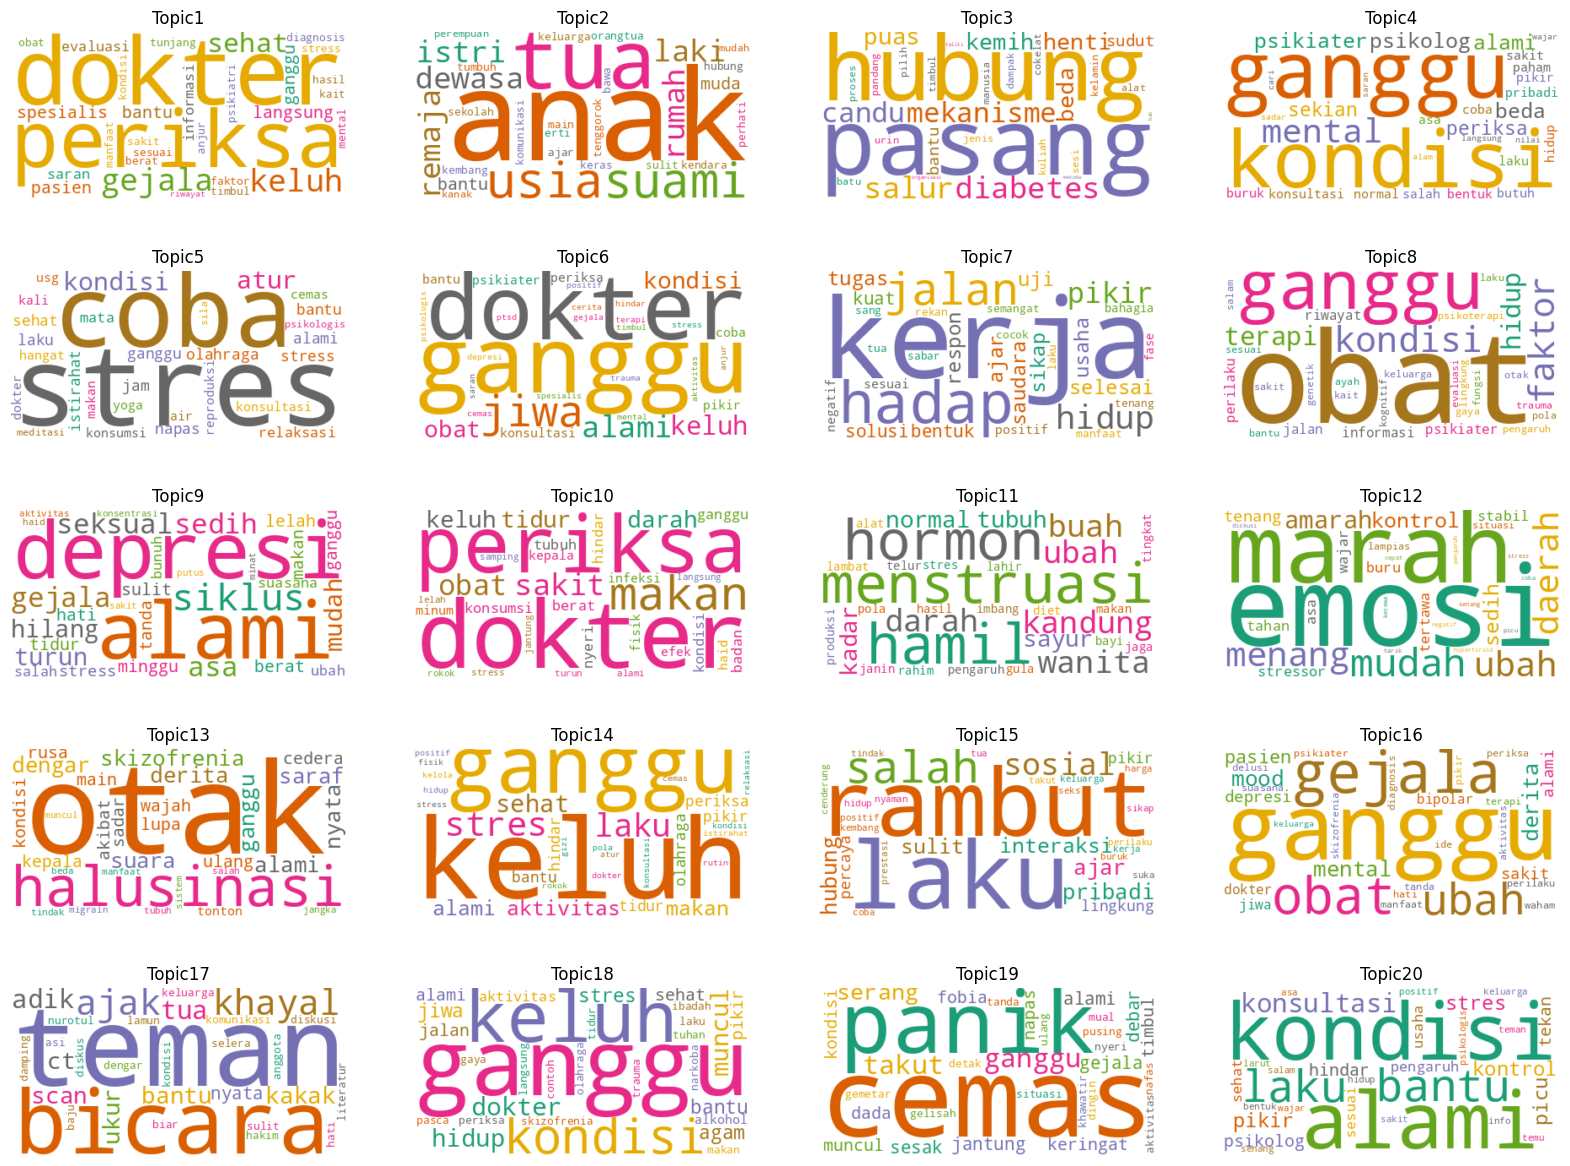

In [ ]:
# Membuat subgrafik untuk setiap topik
for i in range(optimal_model.num_topics):
    wc.generate(text=topics_df["Terms per Topic"][i])
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
# Menampilkan visualisasi interaktif dengan pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(vis)

# Analisis

## Membuat dataframe corpus

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts, num_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num, topn=num_words)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]])], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts, num_words=30)

In [ ]:
# Format dataframe
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
# Create a dataframe to hold results
corpus_topic_df = pd.DataFrame()

# Get the Titles from the original dataframe
corpus_topic_df['row'] = df.index + 1
corpus_topic_df['topik'] = df.topik

# Add dominant topic and contribution to the dataframe
corpus_topic_df['Dominant Topic'] = df_dominant_topic['Dominant_Topic'] + 1
corpus_topic_df['Contribution %'] = df_dominant_topic['Topic_Perc_Contrib'] * 100
corpus_topic_df['Topic Terms'] = df_dominant_topic['Keywords']

In [ ]:
# Display the dataframe
corpus_topic_df.head()

,row,topik,Dominant Topic,Contribution %,Topic Terms
0,1,adhd,14,56.290001,"keluh, ganggu, stres, laku, sehat, aktivitas, alami, makan, periksa, pikir, bantu, tidur, olahraga, hindar, istirahat, fisik, pola, kelola, hidup, cemas, dokter, kondisi, gizi, stress, atur, konsultasi, relaksasi, rutin, positif, rokok"
1,2,adhd,16,30.300001,"ganggu, gejala, obat, ubah, mental, derita, mood, pasien, depresi, alami, sakit, bipolar, dokter, jiwa, psikiater, terapi, delusi, periksa, diagnosis, skizofrenia, tanda, waham, suasana, perilaku, hati, aktivitas, ide, manfaat, pikir, keluarga"
2,3,adhd,18,35.340000,"ganggu, keluh, kondisi, dokter, hidup, muncul, bantu, jiwa, stres, agam, jalan, sehat, alami, pikir, aktivitas, alkohol, periksa, laku, langsung, pasca, tuhan, trauma, skizofrenia, ibadah, gaya, makan, olahraga, contoh, narkoba, tidur"
3,4,adhd,18,62.519997,"ganggu, keluh, kondisi, dokter, hidup, muncul, bantu, jiwa, stres, agam, jalan, sehat, alami, pikir, aktivitas, alkohol, periksa, laku, langsung, pasca, tuhan, trauma, skizofrenia, ibadah, gaya, makan, olahraga, contoh, narkoba, tidur"
4,5,adhd,16,27.709999,"ganggu, gejala, obat, ubah, mental, derita, mood, pasien, depresi, alami, sakit, bipolar, dokter, jiwa, psikiater, terapi, delusi, periksa, diagnosis, skizofrenia, tanda, waham, suasana, perilaku, hati, aktivitas, ide, manfaat, pikir, keluarga"


## Distribusi Topik Dominan di Seluruh Dokumen

In [ ]:
# Menghitung jumlah dokumen dan persentase total dokumen untuk setiap topik dominan
dominant_topic_df = corpus_topic_df['Dominant Topic'].value_counts(normalize=False).reset_index()
dominant_topic_df.columns = ['Dominant Topic', 'Document Count']
dominant_topic_df['Total Document Percentage'] = (dominant_topic_df['Document Count'] * 100) / len(corpus)

dominant_topic_df

,Dominant Topic,Document Count,Total Document Percentage
0,6,2058,13.432544
1,4,1833,11.963971
2,10,1721,11.232948
3,18,1690,11.030612
4,14,1560,10.182103
5,16,1227,8.008616
6,20,1226,8.002089
7,19,864,5.639319
8,9,795,5.188956
9,8,620,4.046733


## Distribusi topik dominan berdasarkan topik asli

In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

,row,topik,Dominant Topic,Contribution %,Topic Terms
0,11658,psikologi,1,97.879997,"dokter, periksa, gejala, keluh, sehat, langsung, bantu, pasien, spesialis, ganggu, evaluasi, saran, informasi, diagnosis, tunjang, stress, hasil, psikiatri, sesuai, sakit, obat, faktor, manfaat, kait, timbul, anjur, berat, mental, kondisi, riwayat"
1,11872,psikologi,2,77.540001,"anak, tua, usia, suami, dewasa, laki, istri, remaja, rumah, bantu, muda, keluarga, sulit, sekolah, ajar, komunikasi, kembang, tenggorok, orangtua, hubung, tumbuh, main, perhati, kendara, keras, bawa, erti, perempuan, kanak, mudah"
2,4082,gangguan kepribadian,3,54.299999,"pasang, hubung, salur, diabetes, mekanisme, candu, puas, kemih, henti, beda, sudut, bantu, jenis, cokelat, kelamin, alat, pandang, timbul, urin, kuliah, dampak, sesi, batu, manusia, pilih, proses, organisasi, bak, teliti, metode"
3,6117,kesehatan mental,4,95.670006,"kondisi, ganggu, mental, psikiater, beda, alami, psikolog, periksa, sekian, pribadi, paham, pikir, butuh, salah, asa, normal, konsultasi, coba, hidup, bentuk, sakit, laku, buruk, langsung, wajar, sadar, nilai, alam, saran, cari"
4,14131,stres,5,78.440002,"stres, coba, kondisi, atur, olahraga, laku, bantu, ganggu, alami, napas, stress, istirahat, sehat, jam, relaksasi, mata, konsultasi, dokter, konsumsi, air, cemas, kali, usg, hangat, makan, reproduksi, yoga, psikologis, meditasi, sila"
5,5323,gangguan mental,6,98.570000,"ganggu, dokter, jiwa, alami, keluh, kondisi, obat, psikiater, bantu, pikir, periksa, konsultasi, coba, spesialis, terapi, saran, cemas, depresi, ptsd, stress, positif, cerita, psikologis, trauma, hindar, mental, gejala, anjur, aktivitas, timbul"
6,2123,depresi,7,68.440002,"kerja, hadap, jalan, hidup, pikir, selesai, saudara, tugas, respon, usaha, uji, ajar, sikap, solusi, bentuk, kuat, positif, sesuai, negatif, bahagia, fase, semangat, sang, manfaat, tenang, rekan, tua, sabar, laku, cocok"
7,3007,gangguan kecemasan umum,8,88.750000,"obat, ganggu, kondisi, faktor, terapi, hidup, psikiater, jalan, riwayat, informasi, perilaku, psikoterapi, bantu, pengaruh, keluarga, trauma, sakit, otak, genetik, gaya, evaluasi, fungsi, salam, ayah, sesuai, lingkung, pola, laku, kait, kognitif"
8,1091,depresi,9,80.400002,"depresi, alami, siklus, gejala, asa, sedih, seksual, hilang, turun, mudah, minggu, berat, lelah, sulit, tidur, ganggu, tanda, hati, makan, stress, salah, suasana, bunuh, ubah, aktivitas, konsentrasi, sakit, haid, putus, minat"
9,14693,stres,10,86.729996,"dokter, periksa, makan, sakit, obat, darah, keluh, tidur, konsumsi, kondisi, berat, ganggu, nyeri, tubuh, hindar, badan, kepala, minum, fisik, efek, infeksi, haid, langsung, samping, jantung, stress, turun, alami, rokok, lelah"
